In [1]:
import numpy as np
import matplotlib.pyplot as plt

# BCC and FCC 

In [12]:
def average_quantities(E_list,V_list,S_list,Comp_list):
    average_E_list=np.empty(len(Comp_list))
    average_S_list=np.empty(len(Comp_list))
    average_V_list=np.empty(len(Comp_list))
    average_b_list=np.empty(len(Comp_list))
    average_nu_list=np.empty(len(Comp_list))
    delta_Vn_list=np.empty([len(Comp_list),len(E_list)])
    for i in range(len(Comp_list)):
        c = Comp_list[i]
        #print(c)
        avg_E = np.dot(E_list,c)
        avg_S = np.dot(S_list,c)
        avg_nu = avg_E/(2*avg_S)-1
        avg_V = np.dot(V_list,c)
        delta_Vn = V_list-avg_V
        avg_b = (4*avg_V)**(1/3)/(2**0.5)
        average_E_list[i]=(avg_E)
        average_S_list[i]=(avg_S)
        average_V_list[i]=(avg_V)
        average_b_list[i]=(avg_b)
        average_nu_list[i]=(avg_nu)
        delta_Vn_list[i,:]=(delta_Vn)
    return average_E_list,average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list

def curtin_BCC(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep):
    kc = 1.38064852*10**(-23) #J/K
    J2eV=6.2415093433*10**18
    ep0 = 10**4   
    aver_S = average_S_list
    aver_b = average_b_list
    
    sum_cndVn_b6_list = np.empty(len(Comp_list))
    
    dEb_list=np.empty(len(Comp_list))
    Ty0_list=np.empty(len(Comp_list))
    delta_ss_list=np.empty(len(Comp_list))
    for i in range(len(Comp_list)):
        c = Comp_list[i]
        #print(delta_Vn_list[i,:])
        #print(delta_Vn_list[i,:]**2)
        sum_cndVn_b6 = np.dot(c,delta_Vn_list[i,:]**2)/average_b_list[i]**6
        #print(sum_cndVn_b6)
        sum_cndVn_b6_list[i]=sum_cndVn_b6
        q_nu = ((1 + average_nu_list)/(1 - average_nu_list))
        dEb = 2.00  *  0.123**(1/3) * aver_S * aver_b**3   * q_nu**(2/3) * sum_cndVn_b6**(1/3)
        Ty0 = 0.040 * 0.123**(-1/3)  *   aver_S    *        q_nu**(4/3) * sum_cndVn_b6**(2/3)
        Ty_T = Ty0  * (1 - ((kc*T)/(dEb) * np.log(ep0/ep))**(2/3) )
        if Ty_T<=Ty0/2:
            Ty_T = Ty0  * np.exp(-1/0.55* kc*T/dEb*np.log(ep0/ep))
        delta_ss = 3.06*Ty_T
        dEb_list[i]=dEb
        Ty0_list[i]=Ty0
        delta_ss_list[i]=delta_ss
    return dEb_list, Ty0_list, delta_ss_list

def curtin_BCC_old(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep):
    kc = 1.38064852*10**(-23) #J/K
    J2eV=6.2415093433*10**18
    ep0 = 10**4   
    aver_S = average_S_list
    aver_b = average_b_list
    
    sum_cndVn_b6_list = np.empty(len(Comp_list))
    
    dEb_list=np.empty(len(Comp_list))
    Ty0_list=np.empty(len(Comp_list))
    delta_ss_list=np.empty(len(Comp_list))
    for i in range(len(Comp_list)):
        c = Comp_list[i]
        #print(delta_Vn_list[i,:])
        #print(delta_Vn_list[i,:]**2)
        sum_cndVn_b6 = np.dot(c,delta_Vn_list[i,:]**2)/average_b_list[i]**6
        #print(sum_cndVn_b6)
        sum_cndVn_b6_list[i]=sum_cndVn_b6
        q_nu = ((1 + average_nu_list)/(1 - average_nu_list))
        dEb = 2.00  *  0.123**(1/3) * aver_S * aver_b**3   * q_nu**(2/3) * sum_cndVn_b6**(1/3)
        Ty0 = 0.040 * 0.123**(-1/3)  *   aver_S    *        q_nu**(4/3) * sum_cndVn_b6**(2/3)
        Ty_T = Ty0  * (1 - ((kc*T)/(dEb) * np.log(ep0/ep))**(2/3) )
        
        delta_ss = 3.06*Ty_T
        dEb_list[i]=dEb
        Ty0_list[i]=Ty0
        delta_ss_list[i]=delta_ss
    return dEb_list, Ty0_list, delta_ss_list

In [3]:
# Mo-Ta-Nb
V_list=np.array([15.941,18.345,18.355])*1e-30
E_list=np.array([326.78,170.02,69.389])*1e9
S_list=np.array([126.4,62.8,24.2])*1e9
Comp_list = np.array([[0.75,0.,0.25]])
ep = 1e-3
T = 1573

In [4]:
average_E_list,average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list= average_quantities(E_list,V_list,S_list,Comp_list)

In [10]:
dEb_list, Ty0_list, delta_ss_list=curtin_BCC(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep)
dEb_list2, Ty0_list2, delta_ss_list2=curtin_BCC_old(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep)



0.001995898788797323
0.001995898788797323


In [11]:
T_list = np.linspace(0,1600,170)


In [15]:
dEb_list_comp0 = np.empty(len(T_list))
Ty0_list_comp0 = np.empty(len(T_list))
delta_ss_list_comp0 = np.empty(len(T_list))
dEb_list_comp0_old = np.empty(len(T_list))
Ty0_list_comp0_old = np.empty(len(T_list))
delta_ss_list_comp0_old = np.empty(len(T_list))
for i in range(len(T_list)):
    T = T_list[i]
    dEb_list, Ty0_list, delta_ss_list=curtin_BCC(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep)
    dEb_list_comp0[i]=(dEb_list[0])
    Ty0_list_comp0[i]=(Ty0_list[0])
    delta_ss_list_comp0[i]=(delta_ss_list[0]/1e6)
    
    dEb_list2, Ty0_list2, delta_ss_list2=curtin_BCC_old(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep)
    dEb_list_comp0_old[i]=(dEb_list2[0])
    Ty0_list_comp0_old[i]=(Ty0_list2[0])
    delta_ss_list_comp0_old[i]=(delta_ss_list2[0]/1e6)

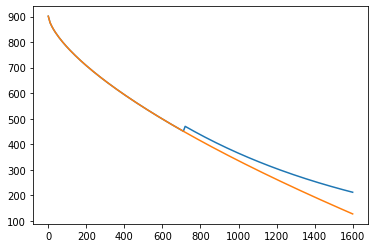

In [16]:
plt.plot(T_list,delta_ss_list_comp0)
plt.plot(T_list,delta_ss_list_comp0_old)

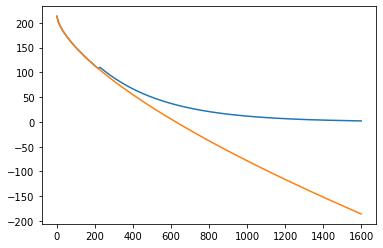

In [19]:
Comp_list = np.array([[0.1,0.00,0.9]])
average_E_list,average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list= average_quantities(E_list,V_list,S_list,Comp_list)

dEb_list, Ty0_list, delta_ss_list=curtin_BCC(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep)
T_list = np.linspace(0,1600,170)

dEb_list_comp0 = np.empty(len(T_list))
Ty0_list_comp0 = np.empty(len(T_list))
delta_ss_list_comp0 = np.empty(len(T_list))
dEb_list_comp0_old = np.empty(len(T_list))
Ty0_list_comp0_old = np.empty(len(T_list))
delta_ss_list_comp0_old = np.empty(len(T_list))
for i in range(len(T_list)):
    T = T_list[i]
    dEb_list, Ty0_list, delta_ss_list=curtin_BCC(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep)
    dEb_list_comp0[i]=(dEb_list[0])
    Ty0_list_comp0[i]=(Ty0_list[0])
    delta_ss_list_comp0[i]=(delta_ss_list[0]/1e6)
    
    dEb_list2, Ty0_list2, delta_ss_list2=curtin_BCC_old(average_S_list,average_V_list,average_b_list,average_nu_list,delta_Vn_list,Comp_list,T,ep)
    dEb_list_comp0_old[i]=(dEb_list2[0])
    Ty0_list_comp0_old[i]=(Ty0_list2[0])
    delta_ss_list_comp0_old[i]=(delta_ss_list2[0]/1e6)
plt.plot(T_list,delta_ss_list_comp0)
plt.plot(T_list,delta_ss_list_comp0_old)